## Problem 1: Multi-Label Support Vector Machine (CVX Additional Exercises 6.18)

The basic SVM described in chapter 8 of the book is used for classification of data with two labels. In this problem we explore an extension of SVM that can be used to carry
out classification of data with more than two labels. Our data consists of pairs:
$(\mathbf{x}_i , y_i ) \in \mathbf{R}^n \times
\{1, \dots , K\},\, i = 1, \dots , m$, where $\mathbf{x}_i$ is the feature vector and $y_i$ is the label of the $i$th data point. (So
the labels can take the values $1, \dots , K$.) Our classifier will use $K$ affine functions, $f_k(\mathbf{x}) = \mathbf{a}^T_k \mathbf{x} + \mathbf{b}_k$ ,
$k = 1, . . . , K$, which we also collect into affine function from $\mathbb{R}^n$ into $\mathbb{R}^K$ as $f(\mathbf{x}) = A\mathbf{x} + \mathbf{b}$. (The
rows of $A$ are $\mathbf{a}^T_k$ .) Given the feature vector $\mathbf{x}$, our model predicts the label $\hat{y} = \mathrm{argmax}_k f_k (\mathbf{x})$, i.e. the predicted label is given by the index of the largest value of the $f_k$ functions evaluated at the data point. We assume that
exact ties never occur, or if they do, an arbitrary choice can be made. Note that if a multiple of 1
is added to $\mathbf{b}$, the classifier does not change. Thus, without loss of generality, we can assume that
$\mathbf{1}^T \mathbf{b} = 0$.

To correctly classify all the data examples perfectly, we would need $f_{y_i} (\mathbf{x}_i ) > \mathrm{max}_{k\neq y_i} f_k (\mathbf{x}_i )$ for all $i$. This set of
inequalities in $a_k$ and $b_k$, are feasible if and only if the set of
inequalities $f_{y_i} (\mathbf{x}_i ) \geq 1 + \mathrm{max}_{k\neq y_i} f_k (\mathbf{x}_i )$ are feasible. This motivates the loss function:

$$
L(A, \mathbf{b}) = \sum_{i=1}^m\left(1 + \mathrm{max}_{k \neq y_i}f_k(\mathbf{x}_i) - f_{y_i}(\mathbf{x}_i)  \right)_+
$$
where $(u)_+ = \mathrm{max}\{u, 0\}$. The multi-label SVM chooses $A$ and $\mathbf{b}$ to minimize
$L(A, b) + \mu\|A\|_F^2,$
subject to $\mathbf{1}^T \mathbf{b} = 0$, where $\mu > 0$ is a regularization parameter. (Several variations on this are
possible, such as regularizing b as well, or replacing the Frobenius norm squared with the sum of
norms of the columns of A.). The Frobenius norm is a generalization of the $2$-norm from vectors to matrices, it is defined as $\|A\|_F = \left(\sum_{ij} A_{ij}^2\right)^{1/2}$ and implemented in `CVX` using `norm(A,'fro')`.

(a) Show how to find $A$ and $\mathbf{b}$ using convex optimization. Be sure to justify any changes of
variables or reformulation (if needed), and convexity of the objective and constraints in your
formulation.


(b) Carry out multi-label SVM on the data given in [multi_label_svm_data.csv](https://github.com/georgehagstrom/DATA609Spring2025/blob/main/website/assignments/labs/labData/multi_label_svm_data.csv). Use the data
given in $\mathbf{X}$ and $y$ to fit the SVM model, for a range of values of $\mu$. Use the data given in [multi_label_svm_test.csv](https://github.com/georgehagstrom/DATA609Spring2025/blob/main/website/assignments/labs/labData/multi_label_svm_test.csv) to test the SVM models. Plot the
test set classification error rate (i.e., the fraction of data examples in the test set for which
$\hat{y} \neq y$) versus $\mu$.

You don’t need to try more than 10 or 20 values of $\mu$, and we suggest choosing them uniformly
on a `log` scale, from (say) $10^{−2}$ to $10^2$ .


**Solution:**

(a) First, the objective function to minimize:

$$L(A, \mathbf{b}) + \mu\|A\|_F^2 = \sum_{i=1}^m\left(1 + \mathrm{max}_{k \neq y_i}f_k(\mathbf{x}_i) - f_{y_i}(\mathbf{x}_i)  \right)_+ + \mu\|A\|_F^2$$

Subject to the constraint $\mathbf{1}^T \mathbf{b} = 0$, $\mu > 0$ is a regularization parameter.

To make this a convex optimization problem, let's use slack variables (Boyd & Vandenberghe, Section 8.6.1, p. 425):

$u_i \geq 0$ for $i = 1,...,m$, slack variables that measure the classification error: $u_i \geq 1 + \max_{k \neq y_i} f_k(\mathbf{x}_i) - f_{y_i}(\mathbf{x}_i),$

$u_i$ will be at least equal to the loss for data point $i$, when we minimize $u_i$ in the objective function, it will exactly equal the loss when the loss is positive (otherwise it will be zero).

To handle the $ \mathrm{max}$ function, we will use (the point-wise maximum of affine functions is convex, we take its epigraph, the resulting inequalities are convex, Boyd & Vandenberghe, Section 3.1, p. 73): $\max_{k \neq y_i} f_k(\mathbf{x}_i) \geq f_k(\mathbf{x}_i) \ \text{for all } k \neq y_i.$

With these substitutions, we get:
$$\begin{array}{ll}
\text{minimize} & \sum_{i=1}^m u_i + \mu\|A\|_F^2 \\
\text{subject to} & u_i \geq 1 + f_k(\mathbf{x}_i) - f_{y_i}(\mathbf{x}_i),
 \text{for all } k \neq y_i,  i=1,...,m\\
& u_i \geq 0, \ i=1,...,m\\
& \mathbf{1}^T \mathbf{b} = 0.
\end{array}$$

Substituting the definition of $f_k(\mathbf{x}_i) = \mathbf{a}_k^T \mathbf{x}_i + b_k$:

$$\begin{array}{ll}
\text{minimize} & \sum_{i=1}^m u_i + \mu\|A\|_F^2 \\
\text{subject to} & u_i \geq 1 + \mathbf{a}_k^T \mathbf{x}_i + b_k - (\mathbf{a}_{y_i}^T \mathbf{x}_i + b_{y_i}), \text{for all } k \neq y_i, \ i=1,...,m\\
& u_i \geq 0, \ i=1,...,m\\
& \mathbf{1}^T \mathbf{b} = 0
\end{array},$$

we minimize over the  variables $A \in \mathbb{R}^{K \times n},\mathbf{b} \in \mathbb{R}^K, u \in \mathbb{R}_+^m$.
Now we have a convex optimization problem: The objective $\sum_{i=1}^m u_i + \mu\|A\|_F^2$ is convex since it's a sum of a linear term and a quadratic norm, and the constraints are all linear, so we're dealing with a convex optimization problem. All constraints are linear inequalities or equalities, they are all convex. The domain of the problem is convex.

(b) We trained multi-label SVM model for 15 different values of the regularization parameter $\mu$ (10^-2 to 10^2, log scale). From the resulting plot of the test error rates against the corresponding $\mu$ values:

- The lowest test error rate is 0.09 (9% misclassification) for $\mu$ = 0.0373 which suggests a good balance between fitting the data and keeping the model simple.

- For small values $\mu < 0.1$, the test error remains low, which makes sense since less regularization allows the model to fit the training data more closely. For $\mu$ from 0.1 to 100, there is an upward trend in the error rate, reaching 0.32 (32%) for $\mu$ = 100.

- The non-monotonic behavior in the mid-range suggests that this dataset might have some underlying complexity, perhaps class imbalances or noisy labels, that affects the regularization's impact.

- The sharp rise for values $\mu > 10$ indicates underfitting, likely because the model prioritizes minimizing $\|A\|_F^2$ over the hinge loss.

This reflects the bias-variance tradeoff in machine learning: too little regularization (small $\mu$) might lead to overfitting, while too much regularization (large $\mu$) leads to underfitting. For this particular dataset, a relatively small amount of regularization ($\mu$ about 0.0373) would give the best test performance, suggesting that the problem might benefit more from accurate classification boundaries than from extremely simple models.

In [ ]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp
from scipy.stats import norm
from scipy.optimize import minimize
from scipy.special import log_ndtr
import math
from scipy.optimize import linprog
from sklearn.preprocessing import StandardScaler

In [ ]:
#Load dataset from Github
train_df = pd.read_csv('https://media.githubusercontent.com/media/georgehagstrom/DATA609Spring2025/refs/heads/main/website/assignments/labs/labData/multi_label_svm_data.csv')
test_df = pd.read_csv('https://media.githubusercontent.com/media/georgehagstrom/DATA609Spring2025/refs/heads/main/website/assignments/labs/labData/multi_label_svm_test.csv')
train_df.info(), train_df.head(), test_df.info(), test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1000 non-null   int64  
 1   x_1     1000 non-null   float64
 2   x_2     1000 non-null   float64
 3   x_3     1000 non-null   float64
 4   x_4     1000 non-null   float64
 5   x_5     1000 non-null   float64
 6   x_6     1000 non-null   float64
 7   x_7     1000 non-null   float64
 8   x_8     1000 non-null   float64
 9   x_9     1000 non-null   float64
 10  x_10    1000 non-null   float64
 11  x_11    1000 non-null   float64
 12  x_12    1000 non-null   float64
 13  x_13    1000 non-null   float64
 14  x_14    1000 non-null   float64
 15  x_15    1000 non-null   float64
 16  x_16    1000 non-null   float64
 17  x_17    1000 non-null   float64
 18  x_18    1000 non-null   float64
 19  x_19    1000 non-null   float64
 20  x_20    1000 non-null   float64
dtypes: float64(20), int64(1)
memory usage:

(None,
    y       x_1       x_2       x_3       x_4       x_5       x_6       x_7  \
 0  5  2.353735 -0.478736 -0.592099  0.023837 -0.024048 -0.272177  0.447972   
 1  1 -1.382124  0.159286 -0.202440 -0.540771  2.059277 -1.087112 -0.596151   
 2  2 -0.651782 -1.783008  0.347985 -0.389052  0.576092  0.570920  0.497190   
 3  6 -0.723374  0.940889  0.446384  0.063251 -0.220595  0.223281  1.090534   
 4  9  0.171802 -0.064620 -0.363568 -1.062481  0.012635 -1.002169 -0.888538   
 
         x_8       x_9  ...      x_11      x_12      x_13      x_14      x_15  \
 0  1.325046 -0.964918  ...  0.236415  1.010687 -1.202464 -0.245103 -1.048232   
 1  0.245661 -1.901101  ... -1.019503 -0.393748 -0.710958  0.321024  0.327958   
 2  0.351553  0.645305  ... -0.529658 -0.436789  0.515800 -0.303118  0.753293   
 3 -0.380058 -0.996469  ...  0.395668 -0.489847 -0.904752  0.400731 -0.824837   
 4 -1.723833  1.196805  ... -0.645432  1.882295  0.373182  0.751067  0.058708   
 
        x_16      x_17      x

Training with mu = 0.0100
Test error rate: 0.100
Training with mu = 0.0193
Test error rate: 0.100
Training with mu = 0.0373
Test error rate: 0.090
Training with mu = 0.0720
Test error rate: 0.110
Training with mu = 0.1389
Test error rate: 0.120
Training with mu = 0.2683
Test error rate: 0.110
Training with mu = 0.5179
Test error rate: 0.110
Training with mu = 1.0000
Test error rate: 0.110
Training with mu = 1.9307
Test error rate: 0.100
Training with mu = 3.7276
Test error rate: 0.180
Training with mu = 7.1969
Test error rate: 0.180
Training with mu = 13.8950
Test error rate: 0.210
Training with mu = 26.8270
Test error rate: 0.200
Training with mu = 51.7947
Test error rate: 0.260
Training with mu = 100.0000
Test error rate: 0.320

Best regularization parameter: 0.0373
Best test error rate: 0.09


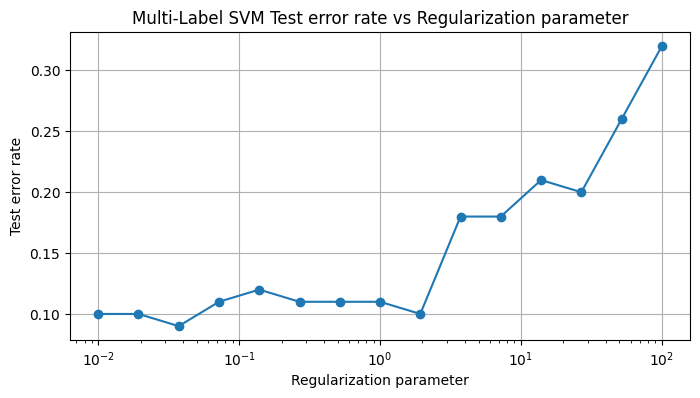

In [ ]:
# Split features and labels, -1 to get zero-based labels
X_train = train_df.drop(columns='y').values
y_train = train_df['y'].astype(int).values - 1
X_test = test_df.drop(columns='y').values
y_test = test_df['y'].astype(int).values - 1

#Scale before SVM
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

#Dimensions, Number of classes, mu values
m_train, n_train = X_train_scaled.shape
K = len(np.unique(y_train))
mu_values = np.logspace(-2, 2, 15)
error_rates = []

#Go through mu values
for mu in mu_values:
    print(f"Training with mu = {mu:.4f}")

    #Variables
    A = cp.Variable((K, n_train))
    b = cp.Variable(K)
    u = cp.Variable(m_train, pos=True)  #Nonnegativity constraint
    constraints = [cp.sum(b) == 0]  #Zero-sum constraint

    #Constraints for each sample
    for i in range(m_train):
        yi = y_train[i]
        xi = X_train_scaled[i]
        for k in range(K):
            if k != yi:
                #Constraint u_i
                constraints.append(
                    u[i] >= 1 + A[k] @ xi + b[k] - (A[yi] @ xi + b[yi])
                )

    #Objective function
    objective = cp.Minimize(cp.sum(u) + mu * cp.norm(A, 'fro')**2)

    #Solve problem
    prob = cp.Problem(objective, constraints)
    prob.solve(verbose=False)

    #Predict on test set
    scores = X_test_scaled @ A.value.T + b.value
    y_pred = np.argmax(scores, axis=1)

    #Error rate
    error_rate = np.mean(y_pred != y_test)
    error_rates.append(error_rate)
    print(f"Test error rate: {error_rate:.3f}")

#Best mu
best_mu_index = np.argmin(error_rates)
best_mu = mu_values[best_mu_index]
best_error_rate = error_rates[best_mu_index]
print(f"\nBest regularization parameter: {best_mu:.4f}")
print(f"Best test error rate: {best_error_rate:.2f}")

# Plot results
plt.figure(figsize=(8, 4))
plt.semilogx(mu_values, error_rates, 'o-')
plt.xlabel('Regularization parameter')
plt.ylabel('Test error rate')
plt.title('Multi-Label SVM Test error rate vs Regularization parameter')
plt.grid(True)
plt.show()

## Problem 2: Maximum Likelihood Prediction of Team Abilities (Adapted from Exercise 7.4 in Convex Optimization Extended Exercises)

A set of $n$ teams compete in a tournament. We
model each team’s ability by a number $a_j,\, j = 1, \cdots , n$. When teams $j$ and $k$ play each
other, the probability that team $j$ wins is equal to:

$$
\mathrm{prob}(a_j − a_k + v > 0)
$$

where $v \sim \mathrm{Normal}(0, \sigma^2 )$. This means
we can also write the probability as $p(\mathrm{i\,\, beats \,\, j}) =  = \Phi\left(\frac{a_j-a_k}{\sigma}\right)$, where $\Phi$ is the cumulative distribution function of
the standard normal distribution.

You are given the outcome of $m$ past games. These are organized as in a game incidence matrix $A$, where the $l$th row of $A$ corresponds to game $l$ and where:

$$
A_{il} = \begin{cases} 1 \quad &\mathrm{if\,\,team\,\, i\,\, played\,\, in\,\, game\,\, l\,\, and\,\, won}  \\
-1 \quad &\mathrm{if\,\, team\,\, i\,\, played\,\, in\,\, game\,\, l\,\, and\,\, lost} l = k^{(i)} \\
0 \quad &\mathrm{otherwise}
\end{cases},
$$
This means that each row of $A$ has exactly two non-zero entries, with a $1$ in the column of the team that played and won, and a $-1$ in the column of the team
that played and lost.

(a) Formulate the problem of finding the maximum likelihood estimate of team abilities, $\hat{a} \in \mathbb{R}^n$,
given the outcomes, as a convex optimization problem. Because the optimal solution can be shifted by a constant, you should specify a prior constraint on the first variable $\hat{a}_0 = 0$. In order to keep the estimates bounded, an additional
set of prior constraints $\hat{a}_i \in [-3, 3]$ should be included in the problem formulation, and you should take $\sigma = 0.25$ to be a constant value rather than a variable. Also, we
note that if a constant is added to all team abilities, there is no change in the probabilities of
game outcomes. This means that $\hat{a}$ is determined only up to a constant, like a potential. But
this doesn’t affect the ML estimation problem, or any subsequent predictions made using the
estimated parameters.

(b) Find $\hat{a}$ for the team data by the game incidence matrix [AMat_train.csv](https://github.com/georgehagstrom/DATA609Spring2025/blob/main/website/assignments/labs/labData/AMat_train.csv). (This matrix gives the
outcomes for a tournament in which each team plays each other team once.) You may find
the CVX function `log_normcdf` helpful for this problem. Remember that the cumulative distribution function of a log-concave distribution is log-concave,
and also that it is vectorized. Hint: the $l$th row of $A\mathrm{a} =
a_{\mathrm{win},l}-a_{\mathrm{lose},l}$.

(c) Use the maximum likelihood estimate $\hat{a}$ found in part (b) to predict the outcomes of next
year’s tournament games, given in the file [team_data_test.csv](https://github.com/georgehagstrom/DATA609Spring2025/blob/main/website/assignments/labs/labData/team_data_test.csv), using
$$
\hat{y}^{(i)} = \mathrm{sign}(\hat{a}_{j^{(i)}} − \hat{a}_{k^{(i)}})
$$

The first two rows of this file contain the indices of the two teams playing, and the third column is $1$ if the first team won and $-1$ otherwise.  Compare
the predictions predictions based on $\hat{a}$ with the actual outcomes, given in the third column of test. Give the
fraction of correctly predicted outcomes.
The games played in train and test are the same, so another, simpler method for predicting
the outcomes in test it to just assume the team that won last year’s match will also win this
year’s match. You can find a similarly structured matrix in the file [team_data_test.csv](https://github.com/georgehagstrom/DATA609Spring2025/blob/main/website/assignments/labs/labData/team_data_test.csv), or you can construct it from the game incidence matrix. Give the percentage of correctly predicted outcomes using this simple method.

**Solution:**

(a) This is a parameter estimation problem (Boyd & Vandenberghe, 2004, Section 7.1). We have:

- n teams with abilities $a_0, a_1, ..., a_{n-1}$

- When team j plays team k, the probability that j wins is $\Phi\left(\frac{a_j-a_k}{\sigma}\right)$

- Game outcomes are recorded in matrix A where rows represent games and columns represent teams

- $\sigma = 0.25$ (fixed)

- The first team's ability is constrained: $a_0 = 0$

- All abilities are bounded: $a_i \in [-3, 3]$

The likelihood function:

1. For a single game l where team j beats team k, the probability is:
$P(\text{j beats k}) = \Phi\left(\frac{a_j-a_k}{\sigma}\right)$

2. The log-likelihood of this outcome is:
$\log P(\text{j beats k}) = \log\Phi\left(\frac{a_j-a_k}{\sigma}\right)$

3. For all games combined, the log-likelihood is:
$\log L(a) = \sum_{l=1}^{m} \log\Phi\left(\frac{a_{w(l)}-a_{l(l)}}{\sigma}\right)$, where w(l) is the winner of game l and l(l) is the loser.

4. Maximum likelihood estimation seeks to maximize this log-likelihood, which is equivalent to minimizing the negative log-likelihood (Boyd & Vandenberghe, 2004, Section 7.1.1):
$\min_{a} -\log L(a) = \min_{a} -\sum_{l=1}^{m} \log\Phi\left(\frac{a_{w(l)}-a_{l(l)}}{\sigma}\right)$

5. Using the game incidence matrix A, for each game l:

- If A[i,l] = 1, team i won

- If A[i,l] = -1, team i lost

- We can rewrite the difference in abilities as:
$a_{w(l)}-a_{l(l)} = \sum_{i=0}^{n-1} A_{il}a_i$


As a result, the optimization problem:
$$\min_{a} -\sum_{l=1}^{m} \log\Phi\left(\frac{\sum_{i=0}^{n-1} A_{il}a_i}{\sigma}\right)$$


The function $\log\Phi(z)$ is concave, and $-\log\Phi(z)$ is convex in z. Since the arguments $\frac{\sum_{i=0}^{n-1} A_{il}a_i}{\sigma}$ are linear in a, and compositions of convex functions with linear functions preserve convexity, our objective function is convex.


The complete formulation is:
$$\begin{aligned}
\min_{a \in \mathbb{R}^n} &-\sum_{l=1}^{m} \log \Phi (\frac{\sum_{i=0}^{n-1} A_{il}a_i}{\sigma})\\
\text{subject to: } &a_0 = 0 \\
&-3 \leq a_i \leq 3, \quad i=0,\ldots,n-1
\end{aligned}$$

This is a convex optimization problem because: The objective function is convex;
The equality constraint $a_0 = 0$ is linear (thus convex); The inequality constraints$-3 \leq a_i \leq 3$ define a convex set.

(b) The optimization problem was solved using the SCS solver in CVXPY, with the log_normcdf function. We obtained the team abilities shown below. As a result, Team 0 is the strongest team (with ability fixed at 0), followed by Teams 4 and 5 with abilities around -0.5. Team 7 is the weakest team, reaching the lower bound of -3.0. These ability estimates reflect the observed game outcomes in the tournament. For example, Team 0 won all 9 games while Team 7 lost all 9 games as shown below. The abilities can be used to predict win probabilities for any pair of teams using the  $P(\text{j beats k}) = \Phi\left(\frac{a_j-a_k}{\sigma}\right)$.

(c) For each test matchup between team $j^{(i)}$ and team $k^{(i)}$, we predict the winner using: $\hat{y}^{(i)} = \mathrm{sign}(\hat{a}_{j^{(i)}} - \hat{a}_{k^{(i)}}).$ If the ability difference is positive, team j wins, otherwise, team k wins. In case the sign is 0, we break ties in favor of the first team.

We then compared our ML-based forecasts to the last-year's winner heuristic: for each pair $(j,k)$, we simply assume the same team that won in training wins in test. This approach simply assumes that the same team that won in the training dataset will also win in the test dataset.

The results:

- ML-based prediction accuracy is 93.33%, correctly predicted 42 out of 45 games.

- Simple prediction method accuracy is 100.00%, correctly predicted 45 out of 45 games

The three games that the ML model incorrectly predicted:

- Game 20: Team 3 vs Team 6. The ML model predicted Team 6 would win (ability -0.543) over Team 3 (ability -0.697), but Team 3 actually won.

- Game 23: Team 3 vs Team 9. The ML model predicted Team 3 would win (ability -0.697) over Team 9 (ability -0.707), but Team 9 actually won.

- Game 31: Team 5 vs Team 6. The ML model predicted Team 5 would win (ability -0.533) over Team 6 (ability -0.543), but Team 6 actually won.

All three incorrect predictions involved games with very small ability differences between the teams, suggesting that games between closely matched teams are harder to predict accurately. The perfect accuracy of the simple prediction method suggests that the tournament results were highly consistent between years, with every matchup having the same outcome in both tournaments. Although the simple heuristic achieves 100% here, the ML model provides calibrated win-probabilities; can handle brand-new pairings; can be threshold-tuned (e.g. at 0.55 instead of 0.5) to balance false positives/negatives.

In [ ]:
#Load data
data =  pd.read_csv('https://media.githubusercontent.com/media/georgehagstrom/DATA609Spring2025/refs/heads/main/website/assignments/labs/labData/AMat_train.csv', index_col=0)
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       45 non-null     int64
 1   1       45 non-null     int64
 2   2       45 non-null     int64
 3   3       45 non-null     int64
 4   4       45 non-null     int64
 5   5       45 non-null     int64
 6   6       45 non-null     int64
 7   7       45 non-null     int64
 8   8       45 non-null     int64
 9   9       45 non-null     int64
dtypes: int64(10)
memory usage: 3.9 KB


(   0  1  2  3  4  5  6  7  8  9
 0  1 -1  0  0  0  0  0  0  0  0
 1  1  0 -1  0  0  0  0  0  0  0
 2  1  0  0 -1  0  0  0  0  0  0
 3  1  0  0  0 -1  0  0  0  0  0
 4  1  0  0  0  0 -1  0  0  0  0,
 None)

In [ ]:
#Extract size
A = data.values
m, n = A.shape

#Abilities a[0]…a[n-1]
a = cp.Variable(n)

#Scale factor using sigma
sigma = 0.25
scale = 1.0 / sigma

#Vector of margins z of length m
#scale * sum_i A[l,i] * a[i]
z = scale * (A @ a)

#Negative log‑likelihood objective
objective = -cp.sum(cp.log_normcdf(z))

#Constraints, gauge + box
constraints = [
    a[0] == 0,    #the first ability to zero
    a >= -3,      #lower bound
    a <= 3        #upper bound
]

#Solve
problem = cp.Problem(cp.Minimize(objective), constraints)
problem.solve()
a_hat = a.value
print("Estimate of team abilities:")
for i, ai in enumerate(a_hat):
    print(f" Team {i}: {ai:.3f}")

#Win probabilities for validation
print("\nSample win probabilities:")
print(f"P(Team 0 beats Team 7): {norm.cdf((a_hat[0] - a_hat[7]) / sigma):.3f}")
print(f"P(Team 5 beats Team 7): {norm.cdf((a_hat[5] - a_hat[7]) / sigma):.3f}")

#Win/Loss Summary
wins = (A == 1).sum(axis=0)
losses = (A == -1).sum(axis=0)
print("\nWin/Loss Summary:")
for i in range(n):
    print(f"Team {i}: {wins[i]} wins, {losses[i]} losses")

Estimate of team abilities:
 Team 0: -0.000
 Team 1: -2.120
 Team 2: -0.697
 Team 3: -2.560
 Team 4: -0.533
 Team 5: -0.543
 Team 6: -1.240
 Team 7: -3.000
 Team 8: -0.707
 Team 9: -1.680

Sample win probabilities:
P(Team 0 beats Team 7): 1.000
P(Team 5 beats Team 7): 1.000

Win/Loss Summary:
Team 0: 9 wins, 0 losses
Team 1: 2 wins, 7 losses
Team 2: 6 wins, 3 losses
Team 3: 1 wins, 8 losses
Team 4: 7 wins, 2 losses
Team 5: 7 wins, 2 losses
Team 6: 4 wins, 5 losses
Team 7: 0 wins, 9 losses
Team 8: 6 wins, 3 losses
Team 9: 3 wins, 6 losses


In [ ]:
#Load test data
test_df = pd.read_csv('https://media.githubusercontent.com/media/georgehagstrom/DATA609Spring2025/refs/heads/main/website/assignments/labs/labData/team_data_test.csv')
i_ind = test_df['team_1'].astype(int) - 1
j_ind = test_df['team_2'].astype(int) - 1
y_true = test_df['result'].astype(int)

#Predict by sign(a_hat[i] - a_hat[j])
y_pred_ml = np.sign(a_hat[i_ind] - a_hat[j_ind])
y_pred_ml[y_pred_ml == 0] = 1 #In case of ties, predict team_1 wins
accuracy_ml = np.mean(y_pred_ml == y_true)

#Mapping from sorted pair -> game row
pair_to_row = {
    tuple(sorted(np.where(A[l]!=0)[0])): l
    for l in range(m)
}

#Predict using last year's results
y_pred_simple = np.array([
    1 if A[pair_to_row[tuple(sorted((ti,tj)))], ti]==1 else -1
    for ti, tj in zip(i_ind, j_ind)
])
accuracy_simple = np.mean(y_pred_simple == y_true)

#Number of correct predictions
ml_correct = np.sum(y_pred_ml == y_true)
simple_correct = np.sum(y_pred_simple == y_true)

print(f"ML-based prediction accuracy: {accuracy_ml*100:.2f}%")
print(f"Correctly predicted: {ml_correct} out of {len(y_true)} games")
print(f"\nSimple Prediction Method: {accuracy_simple*100:.2f}%")
print(f"Correctly predicted: {simple_correct} out of {len(y_true)} games")

#Analyze incorrect predictions
incorrect_indices = np.where(y_pred_ml != y_true)[0]

if len(incorrect_indices) > 0:
    print("\nIncorrect predictions by ML model:")
    for idx in incorrect_indices:
        team1 = i_ind[idx] + 1
        team2 = j_ind[idx] + 1
        print(f"\nGame {idx+1}: Team {team1} vs Team {team2}")
        print(f"Team abilities: {a_hat[i_ind[idx]]:.3f} vs {a_hat[j_ind[idx]]:.3f}")
        print(f"Predicted winner: Team {team1 if y_pred_ml[idx] == 1 else team2}")
        print(f"Actual winner: Team {team1 if y_true[idx] == 1 else team2}")
else:
    print("\nThe ML model made no incorrect predictions.")

ML-based prediction accuracy: 93.33%
Correctly predicted: 42 out of 45 games

Simple Prediction Method: 100.00%
Correctly predicted: 45 out of 45 games

Incorrect predictions by ML model:

Game 20: Team 3 vs Team 6
Team abilities: -0.697 vs -0.543
Predicted winner: Team 6
Actual winner: Team 3

Game 23: Team 3 vs Team 9
Team abilities: -0.697 vs -0.707
Predicted winner: Team 3
Actual winner: Team 9

Game 31: Team 5 vs Team 6
Team abilities: -0.533 vs -0.543
Predicted winner: Team 5
Actual winner: Team 6


## Problem 3: Flux balance analysis in systems biology. (Exercise 21.3 in CVX Additional Exercises)

Flux balance analysis is based on a very simple model of
the reactions going on in a cell, keeping track only of the gross rate of consumption and production
of various chemical species within the cell. Based on the known stoichiometry of the reactions, and
known upper bounds on some of the reaction rates, we can compute bounds on the other reaction
rates, or cell growth, for example.

We focus on $m$ metabolites in a cell, labeled $M_1$ , . . . , $M_m$ . There are $n$ reactions going on, labeled
$R_1$ , . . . , $R_n$ , with nonnegative reaction rates $v_1$ , . . . , $v_n$ . In our particular case, we will be working with a simplified model of cell metabolism having 9 reactions and 6 metabolites. Each reaction has a (known) stoichiometry,
which tells us the rate of consumption and production of the metabolites per unit of reaction rate.
The stoichiometry data is given by the stoichiometry matrix $S \in \mathbb{R}^{m\times n}$ , defined as follows: $S_{ij}$
is the rate of production of $M_i$ due to unit reaction rate $v_j = 1$. Here we consider consumption
of a metabolite as negative production; so $S_{ij} = −2$, for example, means that reaction $\mathbb{R}^j$ causes
metabolite $M_i$ to be consumed at a rate $2v_j$ .

As an example, suppose reaction $R_1$ has the form $M_1 \to M_2 + 2M_3$ . The consumption rate of $M_1$ ,
due to this reaction, is $v_1$ ; the production rate of $M_2$ is $v_1$ ; and the production rate of $M_3$ is $2v_1$ .
(The reaction $R_1$ has no effect on metabolites $M_4$ , . . . , $M_m$ .) This corresponds to a first column of
$S$ of the form $(−1, 1, 2, 0, \dots , 0)$.

Reactions are also used to model flow of metabolites into and out of the cell. For example, suppose
that reaction $R_2$ corresponds to the flow of metabolite $M_1$ into the cell, with $v_2$ giving the flow
rate. This corresponds to a second column of $S$ of the form $(1, 0, . . . , 0)$.

The last reaction, $R_n$ , corresponds to biomass creation, or cell growth, so the reaction rate $v_n$ is
the cell growth rate. The last column of $S$ gives the amounts of metabolites used or created per
unit of cell growth rate.
Since our reactions include metabolites entering or leaving the cell, as well as those converted
to biomass within the cell, we have conservation of the metabolites, which can be expressed as
$Sv = 0$. In addition, we are given upper limits on some of the reaction rates, which we express as
$v \preceq v^{\mathrm{max}}$ , where we set $v_{j}^{\mathrm{max}} = \infty$ if no upper limit on reaction rate $j$ is known. The goal is to
find the maximum possible cell growth rate (i.e., largest possible value of $v_n$ ) consistent with the
constraints:

$$
\mathrm{max}_v v_9 \\
Sv = 0 \\
v \succeq 0 \\
v \preceq v^{\mathrm{max}}
$$

The questions below pertain to the data found in [fba_S.csv](https://github.com/georgehagstrom/DATA609Spring2025/blob/main/website/assignments/labs/labData/fba_S.csv) and
[fba_vmax.csv](https://github.com/georgehagstrom/DATA609Spring2025/blob/main/website/assignments/labs/labData/fba_vmax.csv), which contain the Stoichiometric Matrix and the upper bounds on the reaction fluxes, respectively. This exercise was inspired by the following paper: [Segre et all 2003](https://www.liebertpub.com/doi/abs/10.1089/153623103322452413)

(a) Find the maximum possible cell growth rate $G^{\star}$ , as well as optimal Lagrange multipliers for
the reaction rate limits. How sensitive is the maximum growth rate to the various reaction rate limits?

(b) Essential genes and synthetic lethals. For simplicity, we’ll assume that each reaction is controlled by an associated gene, i.e., gene $G_i$ controls reaction $R_i$ . Knocking out a set of genes
associated with some reactions has the effect of setting the reaction rates (or equivalently, the
associated v max entries) to zero, which of course reduces the maximum possible growth rate.
If the maximum growth rate becomes small enough or zero, it is reasonable to guess that
knocking out the set of genes will kill the cell. An essential gene is one that when knocked
out reduces the maximum growth rate below a given threshold $G^{\mathrm{min}}$ . (Note that $G_n$ is always
an essential gene.) A synthetic lethal is a pair of non-essential genes that when knocked out
reduces the maximum growth rate below the threshold. Find all essential genes and synthetic
lethals for the given problem instance, using the threshold $G^{\mathrm{min}} = 0.2G^{\star}$ .

**Solution:**

(a) The objective is to maximize the cell-growth rate $v_9$ subject to:

$$\text{Metabolite conservation:} \ Sv=0, \\
\text{Reaction rate limits:} v \succeq 0, v \preceq v^{\mathrm{max}}.$$

We have stoichiometric matrix $S \in \mathbb{R}^{6×9}$ (from fba_S.csv, the matrix as loaded from the CSV is 9 by 6, which we transpose for the standard form of the optimization problem) with 6 metabolites ($M_1 \ldots M_6$) and 9 reactions ($R_1 \ldots R_9$). We also have upper bounds $v^{max} \in \mathbb{R}^9$ (from fba_vmax.csv).

Let $\nu \in \mathbb{R}^6$ be the dual variables for the equality constraints $Sv=0$ and $\lambda \in \mathbb{R}^9_{\geq 0}$ the dual variables for the inequality constraints $v \leq v^{max}$ (Boyd & Vandenberghe, 2004, Section 5.1.1). The dual LP is (Boyd & Vandenberghe, 2004, Section 5.2.1):

$$
\mathrm{min}_{\lambda \geq 0, \nu} \ (v^\mathrm{max})^T \lambda \\
\text{subject to}: S^T \nu + \lambda \geq c,
$$

where c is the cost vector (with -1 in position 9 and 0 elsewhere), the dual objective $ (v^\mathrm{max})^T \lambda$ is the minimum "cost" of relaxing the upper-bounds so that one unit of growth becomes feasible, dual variables $\lambda$ associated with the upper bound constraints have the interpretation of sensitivity values: $\lambda_j = \frac{\partial G^*}{\partial v_j^{\mathrm{max}}}$  (Boyd & Vandenberghe, 2004, Section 5.6.3). It means that $\lambda_j$ gives the rate of change of the objective function with respect to changes in the upper bound constraint (Boyd & Vandenberghe, 2004, Section 5.5.2). If $\lambda_j > 0$, increasing $v_j^{\mathrm{max}}$ will increase the maximum growth rate. If $\lambda_j = 0$, small changes in $v_j^{\mathrm{max}}$ won't affect the maximum growth rate (Boyd & Vandenberghe, 2004, Section 5.6.3).

The computed maximum growth rate is $G^* = 13.55$ (the maximum possible biomass production rate (v9)). The optimal reaction rates vector: $v^* = (10.1, 4.2, 5.9, 3.7, 3.7, 0.25, 6.15, 0.25, 13.55)^T$.

Three reactions are operating at their upper bounds, acting as limiting factors for growth: R1 (upper bound = 10.1); R3 (upper bound = 5.9); R5 (upper bound = 3.7). The shadow price vector $\lambda$ returned by result.upper.marginals is non-negative; its i-th component equals the marginal benefit (in units $\Delta G^*$) of relaxing the upper bound of reaction i by one unit, but it is zero for every reaction that is not at its limit. In the code we used lambda_ineq = -result.upper.marginals, HiGHS defines the reduced cost as $-\lambda$, so we flip the sign to obtain $\lambda \geq 0$.

The sensitivity of the maximum growth rate to these limiting reaction rate bounds: R1 Sensitivity = 0.5 (each additional unit of $v_1^{\mathrm{max}}$ raises $G^*$ by 0.5); R3 Sensitivity = 0.5  (each additional unit of $v_3^{\mathrm{max}}$ raises $G^*$ by 0.5); R5 Sensitivity = 1.5 (each additional unit of $v_5^{\mathrm{max}}$ raises $G^*$ by 1.5).

R5 is the most limiting reaction with the highest sensitivity (1.5). Each unit increase in R5's upper bound would increase the growth rate by 1.5 units, making it the most effective target for improving cell growth.

The dual variables ($\nu$) for the metabolite constraints represent the shadow value of one extra unit of metabolite i supplied to the network: M1 0.5 (providing one extra unit of M1 would increase growth rate by 0.5); M2 0.5 (providing one extra unit of M2 would increase growth rate by 0.5); M3 1.0 (providing one extra unit of M3 would increase growth rate by 1.0); M4 1.0 (providing one extra unit of M4 would increase growth rate by 1.0); M5 1.5 (providing one extra unit of M5 would increase growth rate by 1.5); M6 0 (additional M6 would not impact growth rate). Metabolite M5 has the highest shadow price (1.5), meaning it provides the highest marginal value to the system. This directly corresponds to the sensitivity we observed for reaction R5, which produces M5.

The three binding constraints in our system (reactions R1, R3, and R5) represent distinct metabolic bottlenecks. R1 (sensitivity 0.5) reaction likely represents an input flux (note the stoichiometric matrix shows it produces M1 with no consumed metabolites). Its limitation suggests restricted nutrient uptake capacity. R3 (sensitivity 0.5) reaction converts M1 to M3. Its limitation impacts downstream processes dependent on M3, including reactions that ultimately contribute to biomass production. R5 (sensitivity 1.5) reaction produces metabolite M5 and has the highest sensitivity, making it the primary bottleneck in the system. Increasing its capacity would have the most significant impact on growth rate.

These shadow-price results point to R5 as the prime engineering target: a unit increase in its capacity yields a 1.5 unit gain in growth, whereas equivalent expansions of R1 or R3 yield only 0.5. The high shadow price for metabolite M5 (1.5) suggests that supplying additional M5 to the network (if biologically feasible) would significantly enhance growth.

The plots clearly demonstrate our findings. The sensitivity chart shows that reactions R1, R3, and R5 have positive dual variables ($\lambda$ values), with R5 having the highest value (1.5), confirming it as the most limiting reaction.
The optimal reaction rates chart shows that R9 (growth/biomass production) has the highest rate (13.55), followed by R1 (10.1), which is the primary input flux. The reaction rate utilization chart confirms that reactions R1, R3, and R5 are operating at 100% of their upper bounds, validating that they are the key bottlenecks in the metabolic network. The other reactions are operating well below their capacity constraints.

(b) We need to find essential genes and synthetic lethals using the threshold $G^{min} = 0.2G^* = 0.2(13.55) = 2.71$. Two essential genes:

- G1, controls R1: This reaction likely represents an input flux that produces metabolite M1, as seen from the stoichiometric matrix. When knocked out, the growth rate effectively drops to zero, indicating its essential role in the metabolic network.

- G9, controls R9: As expected, G9 is essential since R9 directly represents the biomass production (growth) reaction. Knocking out this gene immediately sets the growth rate to zero.

Synthetic lethal gene pairs:

- G2-G3, control R2-R3: R2 converts M1 to M2, while R3 converts M1 to M3. When both are knocked out simultaneously, the cell loses critical metabolic pathways needed for growth.

- G2-G7, control R2-R7: R2 produces M2 from M1, while R7 converts M3 to M4. Together, they form a synthetic lethal pair, suggesting these reactions collaborate in essential metabolic pathways.

- G4-G7, control R4-R7: R4 involves M2, M4, and M5, while R7 converts M3 to M4. This synthetic lethality suggests the importance of balanced M4 production in the network.

- G5-G7, control R5-R7: R5 produces M5 (identified as the most growth-limiting metabolite in part a), while R7 produces M4. Their combined knockout proves lethal, highlighting the importance of both metabolites.

The zero growth rates tell us that the LP becomes infeasible when these genes are knocked out, meaning the metabolic network cannot function at all.
R1 is critical for network viability (essential gene), while R5, despite having the highest sensitivity in part (a), is not individually essential but becomes lethal when paired with R7. The multiple synthetic lethal pairs involving R7 suggest it plays a central role in alternative metabolic pathways.

In [ ]:
#Load data
fba_s = pd.read_csv('https://media.githubusercontent.com/media/georgehagstrom/DATA609Spring2025/refs/heads/main/website/assignments/labs/labData/fba_S.csv', index_col=0)
fba_vmax = pd.read_csv('https://media.githubusercontent.com/media/georgehagstrom/DATA609Spring2025/refs/heads/main/website/assignments/labs/labData/fba_vmax.csv', index_col=0)
fba_s, fba_s.info(), fba_vmax, fba_vmax.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, R1 to R9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   M1      9 non-null      int64
 1   M2      9 non-null      int64
 2   M3      9 non-null      int64
 3   M4      9 non-null      int64
 4   M5      9 non-null      int64
 5   M6      9 non-null      int64
dtypes: int64(6)
memory usage: 504.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, R1 to R9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   vmax    9 non-null      float64
dtypes: float64(1)
memory usage: 144.0+ bytes


(          M1  M2  M3  M4  M5  M6
 reaction                        
 R1         1   0   0   0   0   0
 R2        -1   1   0   0   0   0
 R3        -1   0   1   0   0   0
 R4         0  -1   0   2  -1   0
 R5         0   0   0   0   1   0
 R6         0  -2   1   0   0   1
 R7         0   0  -1   1   0   0
 R8         0   0   0   0   0  -1
 R9         0   0   0  -1   0   0,
 None,
            vmax
 reaction       
 R1         10.1
 R2        100.0
 R3          5.9
 R4        100.0
 R5          3.7
 R6        100.0
 R7        100.0
 R8        100.0
 R9        100.0,
 None)

Maximum growth rate (G*): 13.55

Optimal reaction rates:
  R1: 10.10
  R2: 4.20
  R3: 5.90
  R4: 3.70
  R5: 3.70
  R6: 0.25
  R7: 6.15
  R8: 0.25
  R9: 13.55

Dual variables (λ, reaction rate limits):
  R1: 0.5
  R2: 0.0
  R3: 0.5
  R4: 0.0
  R5: 1.5
  R6: 0.0
  R7: 0.0
  R8: 0.0
  R9: 0.0

Dual variables (ν, metabolite balance constraints):
  M1: 0.5
  M2: 0.5
  M3: 1.0
  M4: 1.0
  M5: 1.5
  M6: 0.0
Reaction | Rate | Upper Bound | Binding? | λ
-----------------------------------------------------------------
R1 | 10.100 |      10.10 |   Yes   | 0.5
R2 |  4.200 |     100.00 |   No    | 0.0
R3 |  5.900 |       5.90 |   Yes   | 0.5
R4 |  3.700 |     100.00 |   No    | 0.0
R5 |  3.700 |       3.70 |   Yes   | 1.5
R6 |  0.250 |     100.00 |   No    | 0.0
R7 |  6.150 |     100.00 |   No    | 0.0
R8 |  0.250 |     100.00 |   No    | 0.0
R9 | 13.550 |     100.00 |   No    | 0.0

Verifying sensitivities through perturbation:
R1:
  A 1% increase in the limit would increase growth rate by 0.05 u

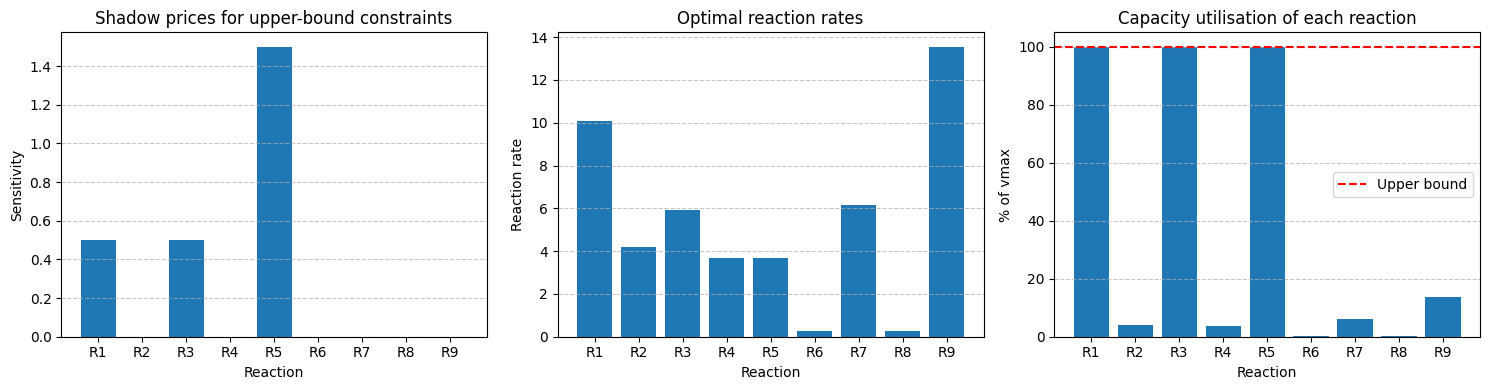

In [ ]:
#Stoichiometric matrix, vmax values
S_raw = fba_s.values
S = S_raw.T
vmax = fba_vmax['vmax'].values

#9 reactions and 6 metabolites
n_metabolites, n_reactions = S.shape

#Optimization problem
#Transpose S, S is provided as reactions x metabolites
#We need metabolites x reactions
c = np.zeros(n_reactions)
c[8] = -1 #maximize v9
A_eq = S
b_eq = np.zeros(n_metabolites)
bounds = [(0, vmax[i]) for i in range(n_reactions)]

#Solve the linear program
result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

#Optimal solution
optimal_rates = result.x
optimal_growth_rate = optimal_rates[8]
lambda_ineq = -result.upper.marginals  #Upper bound duals
nu_eq = result.eqlin.marginals  #Metabolite balance duals

print(f"Maximum growth rate (G*): {optimal_growth_rate:.2f}")

print("\nOptimal reaction rates:")
for i, j in zip(fba_s.index, optimal_rates):
    print(f"  {i}: {j:.2f}")

print("\nDual variables (λ, reaction rate limits):")
for i, j in zip(fba_s.index, lambda_ineq):
    print(f"  {i}: {max(0, j):.1f}")

print("\nDual variables (ν, metabolite balance constraints):")
for i, j in enumerate(nu_eq, start=1):
    print(f"  M{i}: {max(0, j):.1f}")

#Sensitivity analysis
print("Reaction | Rate | Upper Bound | Binding? | λ")
print("-" * 65)
binding_reactions = []
for i in range(n_reactions):
    binding = np.isclose(optimal_rates[i], vmax[i], atol=1e-5)
    if binding:
        binding_reactions.append(i)
    bind_str = "Yes" if binding else "No"
    print(f"{fba_s.index[i]} | {optimal_rates[i]:6.3f} | {vmax[i]:10.2f} |"
          f" {bind_str:^7} | {max(0, lambda_ineq[i]):.1f}")

#Sensitivity verification through direct perturbation
print("\nVerifying sensitivities through perturbation:")
perturb = 0.01
for i in binding_reactions:
    new_bounds = list(bounds)
    new_bounds[i] = (0, vmax[i]*(1+perturb))
    new_result   = linprog(c, A_eq=A_eq, b_eq=b_eq,
                       bounds=new_bounds, method='highs')
    growth_increase = new_result.x[8] - optimal_growth_rate
    theoretical = lambda_ineq[i] * vmax[i] * perturb
    error_pct = abs((growth_increase - theoretical)/theoretical)*100
    print(f"{fba_s.index[i]}:")
    print(f"  A 1% increase in the limit would increase growth rate by {growth_increase:.2f} units")
    print(f"  Theoretical change: {theoretical:.2f}")
    print(f"  Difference: {error_pct:.2f}%")

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=False)

#Bar chart of sensitivities
axes[0].bar(fba_s.index, lambda_ineq)
axes[0].set_xlabel('Reaction')
axes[0].set_ylabel('Sensitivity')
axes[0].set_title('Shadow prices for upper-bound constraints')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

#Bar chart of optimal reaction rates
axes[1].bar(fba_s.index, optimal_rates)
axes[1].set_xlabel('Reaction')
axes[1].set_ylabel('Reaction rate')
axes[1].set_title('Optimal reaction rates')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

#Bar chart of reaction rates as a percentage of their upper bounds
utilization = optimal_rates / vmax * 100
axes[2].bar(fba_s.index, utilization)
axes[2].set_xlabel('Reaction')
axes[2].set_ylabel('% of vmax')
axes[2].set_title('Capacity utilisation of each reaction')
axes[2].axhline(100, color='r', linestyle='--', label='Upper bound')
axes[2].legend()
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
#Threshold
G_min = 0.2 * optimal_growth_rate
print(f"Threshold G_min = {G_min:.2f}")

#Growth rate with knocked out genes
def calc_growth_with_knockout(reactions):
    new_bounds = list(bounds)
    #Knocked out reaction bounds to zero
    for r in reactions:
        new_bounds[r] = (0, 0)
    #Solve LP with new bounds
    result_gene = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=new_bounds, method='highs')
    if not result_gene.success:
        return 0
    return result_gene.x[8]

#Essential genes
essential_genes = []
for i in range(n_reactions):
    growth = calc_growth_with_knockout([i])
    if growth < G_min:
        essential_genes.append(i)

print("Essential genes:")
for gene in essential_genes:
    print(f"G{gene+1} (controls R{gene+1}): Growth rate = {abs(calc_growth_with_knockout([gene])):.1f}")

#Synthetic lethals
non_essential = [i for i in range(n_reactions) if i not in essential_genes]
synthetic_lethals = []

for i in range(len(non_essential)):
    for j in range(i+1, len(non_essential)):
        gene1 = non_essential[i]
        gene2 = non_essential[j]
        growth = calc_growth_with_knockout([gene1, gene2])
        if growth < G_min:
            synthetic_lethals.append((gene1, gene2))

print("Synthetic lethal gene pairs:")
for gene1, gene2 in synthetic_lethals:
    growth = calc_growth_with_knockout([gene1, gene2])
    print(f"G{gene1+1}-G{gene2+1} (control R{gene1+1}-R{gene2+1}): Growth rate = {abs(growth):.1f}")

Threshold G_min = 2.71
Essential genes:
G1 (controls R1): Growth rate = 0.0
G9 (controls R9): Growth rate = 0.0
Synthetic lethal gene pairs:
G2-G3 (control R2-R3): Growth rate = 0.0
G2-G7 (control R2-R7): Growth rate = 0.0
G4-G7 (control R4-R7): Growth rate = 0.0
G5-G7 (control R5-R7): Growth rate = 0.0


## Reference

1. Boyd, S., & Vandenberghe, L. (2004). *Convex optimization*. Cambridge University Press. https://doi.org/10.1017/CBO9780511804441

2. Disciplined Convex Programming. (n.d.). https://www.cvxpy.org/tutorial/dcp/index.html
3. SciPy Community. (n.d.). scipy.optimize.linprog — SciPy v1.15.2 manual. SciPy. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html